In [55]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [56]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [57]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [58]:
coordinates

[(21.788435814472223, -78.2538084665114),
 (37.364855910969, 41.38035945953442),
 (-68.51320791137809, -175.31396102689317),
 (67.93611579963135, -8.75868302909646),
 (-45.11069927923855, -33.72498109340623),
 (-83.15105495262802, -85.86098199340749),
 (-47.39297277823075, -36.87731033748909),
 (65.2364042816769, 101.00767551187346),
 (-72.05944929639092, 56.79203423913643),
 (-85.82275409826262, -159.56458028922492),
 (27.80411462704275, -43.33025454734073),
 (-30.325358241818435, -138.61683685292422),
 (70.19808396057485, 10.26579922137094),
 (-69.42654457667962, -95.18509382631687),
 (67.96219593522747, 51.508577984345976),
 (-74.59372449782563, -66.62162329970337),
 (-71.60737758285525, 33.3125246091202),
 (-57.682396808115115, 37.08252573134291),
 (65.55151990104292, -96.02945399312638),
 (10.261689733848954, 83.33816049274856),
 (7.2189951957889065, 164.35279521650466),
 (81.72182902419712, 51.99899693341325),
 (-46.31071259810977, -100.4929970779279),
 (-76.54488636828751, 77.38

In [59]:
from citipy import citipy
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [60]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [ ]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_country = city_weather["sys"]["country"]
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        # Adding Weather description
        weather_descriptin = city_weather["weather"][0]["description"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Date": city_date,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | esmeralda
Processing Record 2 of Set 1 | midyat
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | vestmanna
Processing Record 5 of Set 1 | cidreira
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | chuy
Processing Record 8 of Set 1 | tura
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | sorland
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | naryan-mar
Processing Record 16 of Set 1 | port elizabeth
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | trincomalee
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | belushya guba
City not found. Skipping...
Processing Reco

Processing Record 41 of Set 4 | kharovsk
Processing Record 42 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 43 of Set 4 | nouadhibou
Processing Record 44 of Set 4 | stephenville
Processing Record 45 of Set 4 | xichang
Processing Record 46 of Set 4 | aklavik
Processing Record 47 of Set 4 | bayan
Processing Record 48 of Set 4 | misratah
Processing Record 49 of Set 4 | dongsheng
Processing Record 50 of Set 4 | fairbanks
Processing Record 1 of Set 5 | sao filipe
Processing Record 2 of Set 5 | ponta do sol
Processing Record 3 of Set 5 | sola
Processing Record 4 of Set 5 | saint-pierre
Processing Record 5 of Set 5 | san jose
Processing Record 6 of Set 5 | lata
Processing Record 7 of Set 5 | wakkanai
Processing Record 8 of Set 5 | weyburn
Processing Record 9 of Set 5 | pisz
Processing Record 10 of Set 5 | araouane
Processing Record 11 of Set 5 | mount isa
Processing Record 12 of Set 5 | lixourion
Processing Record 13 of Set 5 | samfya
Processing Record 14 of 

Processing Record 30 of Set 8 | san ramon
Processing Record 31 of Set 8 | karkaralinsk
City not found. Skipping...
Processing Record 32 of Set 8 | konosha
Processing Record 33 of Set 8 | alyangula
Processing Record 34 of Set 8 | isangel
Processing Record 35 of Set 8 | tayu
Processing Record 36 of Set 8 | nizhniy baskunchak
Processing Record 37 of Set 8 | miyako
Processing Record 38 of Set 8 | vallenar
Processing Record 39 of Set 8 | yabelo
Processing Record 40 of Set 8 | hanstholm
Processing Record 41 of Set 8 | goundam
Processing Record 42 of Set 8 | sisimiut
Processing Record 43 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 44 of Set 8 | mocambique
City not found. Skipping...
Processing Record 45 of Set 8 | dubenskiy
City not found. Skipping...
Processing Record 46 of Set 8 | hervey bay
Processing Record 47 of Set 8 | bosaso
Processing Record 48 of Set 8 | vozhd proletariata
City not found. Skipping...
Processing Record 49 of Set 8 | noyabrsk
Processing Record 50

In [ ]:
len(city_data)

In [ ]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

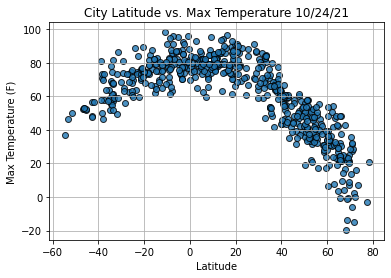

In [31]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

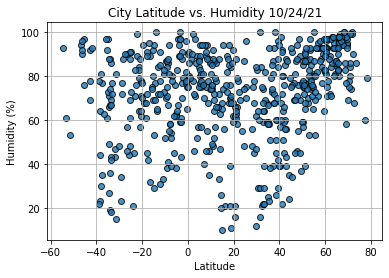

In [32]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

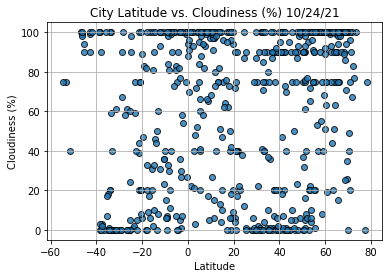

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

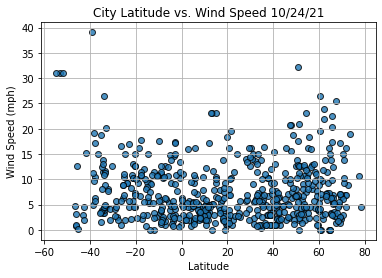

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [39]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [40]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pevek,RU,2021-10-24 18:23:49,69.7008,170.3133,7.18,94,100,2.13
4,Torbay,CA,2021-10-24 18:25:38,47.6666,-52.7314,60.49,94,90,20.71
5,Albany,US,2021-10-24 18:32:22,42.6001,-73.9662,58.80,60,73,1.99
6,Birobidzhan,RU,2021-10-24 18:35:25,48.8000,132.9500,39.06,69,6,3.22
7,Yellowknife,CA,2021-10-24 18:35:25,62.4560,-114.3525,41.56,84,90,21.85


In [42]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

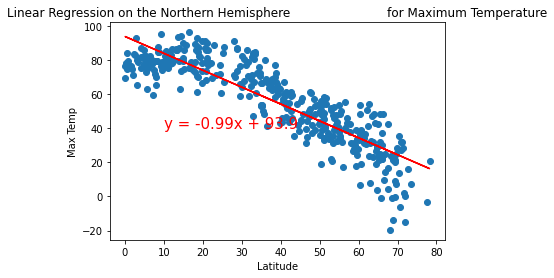

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

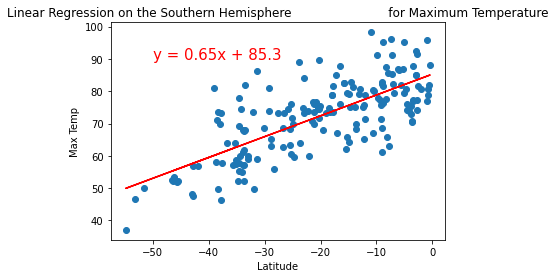

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

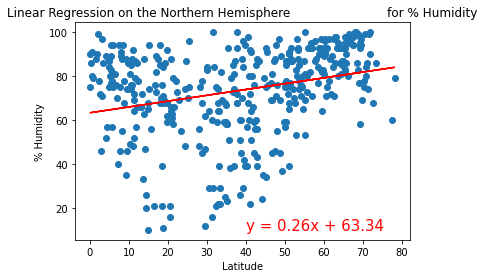

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

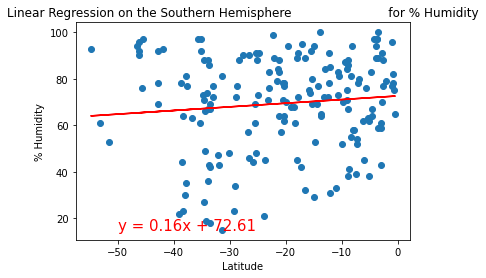

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

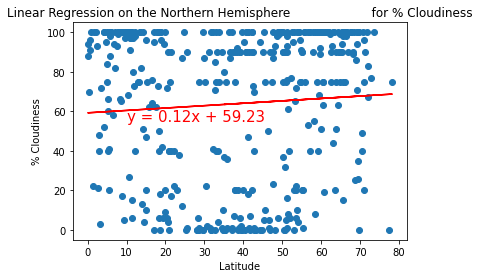

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

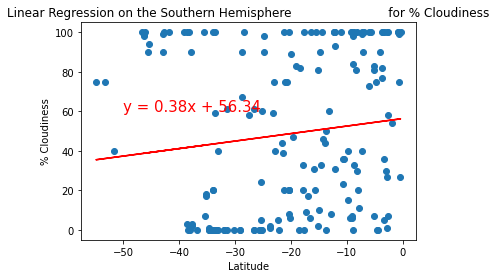

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))